In [1]:
import IPython
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import HTML, display
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import classification_report


In [2]:
# Data Reading
df = pd.read_csv("data/credit_card_churn.csv")
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [3]:
df.tail()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,...,10388.0,1961,8427.0,0.703,10294,61,0.649,0.189,0.996620,0.003377


In [4]:
df.shape

(10127, 23)

In [5]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [7]:
# Defining the target feature
target = "Attrition_Flag"

In [8]:
df[target].value_counts()
df[target].value_counts(normalize=True)

Attrition_Flag
Existing Customer    0.83934
Attrited Customer    0.16066
Name: proportion, dtype: float64

In [9]:
# Extracting X and y features from the DF
X = df.drop(columns = [target])
y = df[target]

In [10]:
# Data Splitting - Using random numbers
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size = 0.20,
                                                   random_state = 42,
                                                   stratify = y)

In [11]:
X_train.head()

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
1602,806407308,54,F,3,College,Single,Unknown,Blue,49,6,...,13184.0,0,13184.0,1.166,2047,33,0.179,0.000,0.994850,0.00515
7791,801786483,51,M,0,High School,Single,$80K - $120K,Blue,45,3,...,10648.0,2517,8131.0,0.708,4930,89,0.978,0.236,0.000160,0.99984
7177,779870883,45,F,4,High School,Single,$40K - $60K,Blue,29,3,...,4595.0,1781,2814.0,0.708,3746,68,0.545,0.388,0.000070,0.99993
97,720336708,53,M,3,Doctorate,Married,$40K - $60K,Blue,35,5,...,3789.0,1706,2083.0,1.047,1609,42,0.680,0.450,0.000270,0.99973
4820,716769783,48,F,2,Graduate,Married,Unknown,Blue,40,3,...,5104.0,736,4368.0,0.679,3943,78,0.696,0.144,0.000327,0.99967


In [12]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8101, 22), (2026, 22), (8101,), (2026,))

In [13]:
df.dtypes

CLIENTNUM                                                                                                                               int64
Attrition_Flag                                                                                                                         object
Customer_Age                                                                                                                            int64
Gender                                                                                                                                 object
Dependent_count                                                                                                                         int64
Education_Level                                                                                                                        object
Marital_Status                                                                                                                         object
Income

In [14]:
# Declaring diff features

# Numeric Columns (Scaling)
numeric_feats = ["Customer_Age",
                 "Dependent_count",
                 "Months_on_book",
                 "Total_Relationship_Count",
                 "Months_Inactive_12_mon",
                 "Contacts_Count_12_mon",
                 "Credit_Limit",
                 "Total_Revolving_Bal",
                 "Avg_Open_To_Buy",
                 "Total_Amt_Chng_Q4_Q1",
                 "Total_Trans_Amt",
                 "Total_Trans_Ct",
                 "Total_Ct_Chng_Q4_Q1",
                 "Avg_Utilization_Ratio"]

# Categorical Features (OHE)
categorical_feats = ["Gender",
                     "Education_Level",
                     "Marital_Status",
                     "Income_Category",
                     "Card_Category"]

# Dropping Features
drop_feats = ["CLIENTNUM",
              "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1",
              "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"]

In [15]:
set(categorical_feats).intersection(numeric_feats)

set()

In [16]:
target in numeric_feats or target in categorical_feats

False

In [17]:
for col in numeric_feats:
    print(col, X[col].nunique())

Customer_Age 45
Dependent_count 6
Months_on_book 44
Total_Relationship_Count 6
Months_Inactive_12_mon 7
Contacts_Count_12_mon 7
Credit_Limit 6205
Total_Revolving_Bal 1974
Avg_Open_To_Buy 6813
Total_Amt_Chng_Q4_Q1 1158
Total_Trans_Amt 5033
Total_Trans_Ct 126
Total_Ct_Chng_Q4_Q1 830
Avg_Utilization_Ratio 964


In [18]:
# Preprocesssor for diff transformations to cols
preprocessor = make_column_transformer(
    (StandardScaler(), numeric_feats),
    (OneHotEncoder(), categorical_feats),
    ("drop", drop_feats)
)


In [19]:
preprocessor

,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('standardscaler', ...), ('onehotencoder', ...), ...]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers contains sparse matrices,these will be stacked as a sparse matrix if the overall density islower than this value. Use ``sparse_threshold=0`` to always returndense. When the transformed output consists of all dense data, thestacked result will be dense, and this keyword will be ignored.",0.3
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.",None
,"transformer_weights transformer_weights: dict, default=NoneMultiplicative weights for features per transformer. The output of thetransformer is multiplied by these weights. Keys are transformer names,values the weights.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each transformer will beprinted as it is completed.",False
,"verbose_feature_names_out verbose_feature_names_out: bool, str or Callable[[str, str], str], default=True- If True, :meth:`ColumnTransformer.get_feature_names_out` will prefix all feature names with the name of the transformer that generated that feature. It is equivalent to setting `verbose_feature_names_out=""{transformer_name}__{feature_name}""`.- If False, :meth:`ColumnTransformer.get_feature_names_out` will not prefix any feature names and will error if feature names are not unique.- If ``Callable[[str, str], str]``, :meth:`ColumnTransformer.get_feature_names_out` will rename all the features using the name of the transformer. The first argument of the callable is the transformer name and the second argument is the feature name. The returned string will be the new feature name.- If ``str``, it must be a string ready for formatting. The given string will be formatted using two field names: ``transformer_name`` an

In [20]:
# Creating pipeline for LR(Baseline Model)

model = LogisticRegression(max_iter=2000)

lr_pipe = make_pipeline(preprocessor, model)

lr_pipe.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('columntransformer', ...), ('logisticregression', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('standardscaler', ...), ('onehotencoder', ...), ...]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If

In [21]:
# Getting predictions and probabilities
pred = lr_pipe.predict(X_test)
proba = lr_pipe.predict_proba(X_test)[:, 1]

print(classification_report(y_test, pred))
print("ROC AUC:", roc_auc_score(y_test, proba))

                   precision    recall  f1-score   support

Attrited Customer       0.76      0.55      0.64       325
Existing Customer       0.92      0.97      0.94      1701

         accuracy                           0.90      2026
        macro avg       0.84      0.76      0.79      2026
     weighted avg       0.89      0.90      0.89      2026

ROC AUC: 0.9170117125672681


In [22]:
# Extract fitted preprocessor and model
preprocessor_fitted = lr_pipe.named_steps["columntransformer"]
logreg_fitted = lr_pipe.named_steps["logisticregression"]


In [23]:
feature_names = preprocessor_fitted.get_feature_names_out()
len(feature_names)


37

In [24]:
coefs = logreg_fitted.coef_.ravel()

coef_df = pd.DataFrame({
    "feature": feature_names,
    "coefficient": coefs,
    "abs_coefficient": np.abs(coefs),
    "odds_ratio": np.exp(coefs)
})

coef_df = coef_df.sort_values("abs_coefficient", ascending=False)
coef_df.head(15)


,feature,coefficient,abs_coefficient,odds_ratio
11,standardscaler__Total_Trans_Ct,2.728047,2.728047,15.302970
10,standardscaler__Total_Trans_Amt,-1.585022,1.585022,0.204943
15,onehotencoder__Gender_M,1.010740,1.010740,2.747632
33,onehotencoder__Card_Category_Blue,0.746936,0.746936,2.110524
7,standardscaler__Total_Revolving_Bal,0.745484,0.745484,2.107460
12,standardscaler__Total_Ct_Chng_Q4_Q1,0.727215,0.727215,2.069309
3,standardscaler__Total_Relationship_Count,0.675944,0.675944,1.965889
24,onehotencoder__Marital_Status_Married,0.636210,0.636210,1.889308
27,onehotencoder__Income_Category_$120K +,-0.590527,0.590527,0.554035
5,standardscaler__Contacts_Count_12_mon,-0.572162,0.572162,0.564304


In [25]:
y.value_counts()
y.unique()


array(['Existing Customer', 'Attrited Customer'], dtype=object)

The baseline logistic regression achieves a ROC-AUC of 0.92, indicating strong discriminatory power. Coefficient analysis reveals that behavioral engagement variables dominate churn prediction. Higher transaction amounts and increased customer interactions are associated with substantially lower churn odds, while lower-tier card categories and certain demographic indicators are associated with increased churn risk. Interestingly, transaction frequency exhibits a strong positive association with churn, suggesting potential behavioral shifts preceding attrition. Some effects, such as inactivity measures, appear counterintuitive and may reflect collinearity or encoding choices, highlighting the importance of careful model interpretation.

In [26]:
y = (df["Attrition_Flag"] == "Attrited Customer").astype(int)


In [27]:
X = df.drop(columns=[target])

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

lr_pipe.fit(X_train, y_train)


,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('columntransformer', ...), ('logisticregression', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('standardscaler', ...), ('onehotencoder', ...), ...]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If

In [28]:
y.value_counts()
y.unique()


array([0, 1])

In [29]:
pred = lr_pipe.predict(X_test)
proba = lr_pipe.predict_proba(X_test)[:, 1]

print(classification_report(y_test, pred))
print("ROC AUC:", roc_auc_score(y_test, proba))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1701
           1       0.77      0.54      0.63       325

    accuracy                           0.90      2026
   macro avg       0.84      0.75      0.79      2026
weighted avg       0.89      0.90      0.89      2026

ROC AUC: 0.9167204811649257


In [30]:
preprocessor_fitted = lr_pipe.named_steps["columntransformer"]
logreg_fitted = lr_pipe.named_steps["logisticregression"]

In [31]:
feature_names = preprocessor_fitted.get_feature_names_out()
len(feature_names)

37

In [32]:
coefs = logreg_fitted.coef_.ravel()

coef_df = pd.DataFrame({
    "feature": feature_names,
    "coefficient": coefs,
    "abs_coefficient": np.abs(coefs),
    "odds_ratio": np.exp(coefs)
})

coef_df = coef_df.sort_values("abs_coefficient", ascending=False)
coef_df.head(15)

,feature,coefficient,abs_coefficient,odds_ratio
11,standardscaler__Total_Trans_Ct,-2.745251,2.745251,0.064232
10,standardscaler__Total_Trans_Amt,1.563652,1.563652,4.776232
15,onehotencoder__Gender_M,-0.901693,0.901693,0.405882
33,onehotencoder__Card_Category_Blue,-0.794664,0.794664,0.451733
3,standardscaler__Total_Relationship_Count,-0.741036,0.741036,0.476620
7,standardscaler__Total_Revolving_Bal,-0.724755,0.724755,0.484443
12,standardscaler__Total_Ct_Chng_Q4_Q1,-0.671673,0.671673,0.510853
24,onehotencoder__Marital_Status_Married,-0.610602,0.610602,0.543024
5,standardscaler__Contacts_Count_12_mon,0.570670,0.570670,1.769451
4,standardscaler__Months_Inactive_12_mon,0.519362,0.519362,1.680955


In [33]:
param_grid = {
    "logisticregression__C": [0.01, 0.1, 1, 10],
    "logisticregression__class_weight": [None, "balanced"]
}

In [34]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(
    estimator=lr_pipe,
    param_grid=param_grid,
    scoring="roc_auc",
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid.fit(X_train, y_train)


Fitting 5 folds for each of 8 candidates, totalling 40 fits


,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",Pipeline(step..._iter=2000))])
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'logisticregression__C': [0.01, 0.1, ...], 'logisticregression__class_weight': [None, 'balanced']}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'roc_auc'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displ

In [35]:
grid.best_params_


{'logisticregression__C': 10, 'logisticregression__class_weight': 'balanced'}

In [36]:
grid.best_score_


np.float64(0.9252313601674171)

In [37]:
best_model = grid.best_estimator_


In [38]:
# from sklearn.metrics import classification_report, roc_auc_score

y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("Test ROC AUC:", roc_auc_score(y_test, y_prob))


              precision    recall  f1-score   support

           0       0.96      0.86      0.91      1701
           1       0.53      0.82      0.64       325

    accuracy                           0.85      2026
   macro avg       0.75      0.84      0.78      2026
weighted avg       0.89      0.85      0.87      2026

Test ROC AUC: 0.9207452629674853


In [39]:
# Base model
print(classification_report(y_test, pred))
print("ROC AUC:", roc_auc_score(y_test, proba))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1701
           1       0.77      0.54      0.63       325

    accuracy                           0.90      2026
   macro avg       0.84      0.75      0.79      2026
weighted avg       0.89      0.90      0.89      2026

ROC AUC: 0.9167204811649257


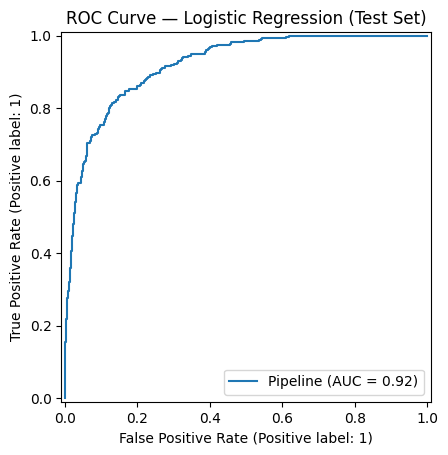

In [40]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(best_model, X_test, y_test)
plt.title("ROC Curve — Logistic Regression (Test Set)")
plt.savefig("plots/roc_curve.png", bbox_inches="tight", dpi=150)
plt.show()


The model demonstrates strong discriminative ability, indicating that it can reliably rank churned customers above non-churned customers across a wide range of thresholds.

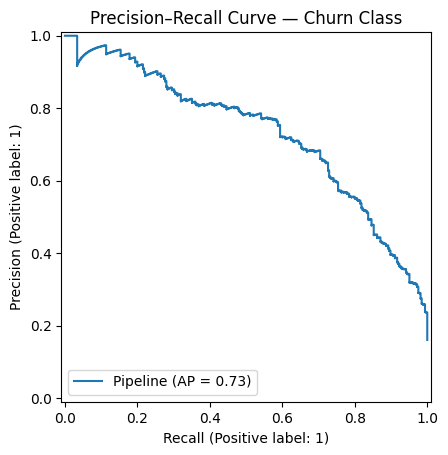

In [41]:
from sklearn.metrics import PrecisionRecallDisplay

PrecisionRecallDisplay.from_estimator(best_model, X_test, y_test)
plt.title("Precision–Recall Curve — Churn Class")
plt.savefig("plots/precision_recall.png", bbox_inches="tight", dpi=150)
plt.show()


The model maintains a strong balance between precision and recall for churned customers, with performance degrading only when recall is pushed close to 1.0.

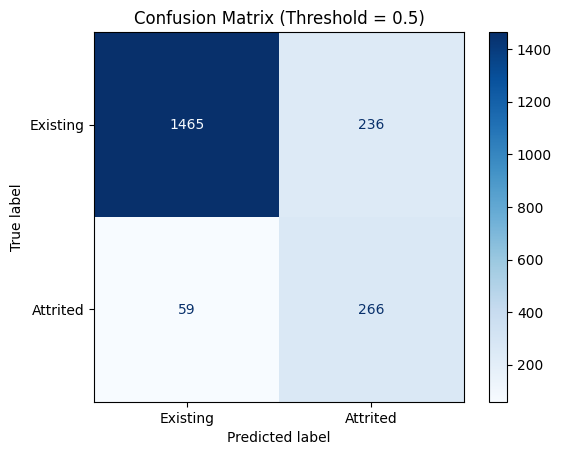

In [42]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(
    best_model,
    X_test,
    y_test,
    display_labels=["Existing", "Attrited"],
    cmap="Blues"
)
plt.title("Confusion Matrix (Threshold = 0.5)")
plt.show()


At the default threshold of 0.5, the model captures ~82% of churned customers while flagging ~14% of existing customers incorrectly.

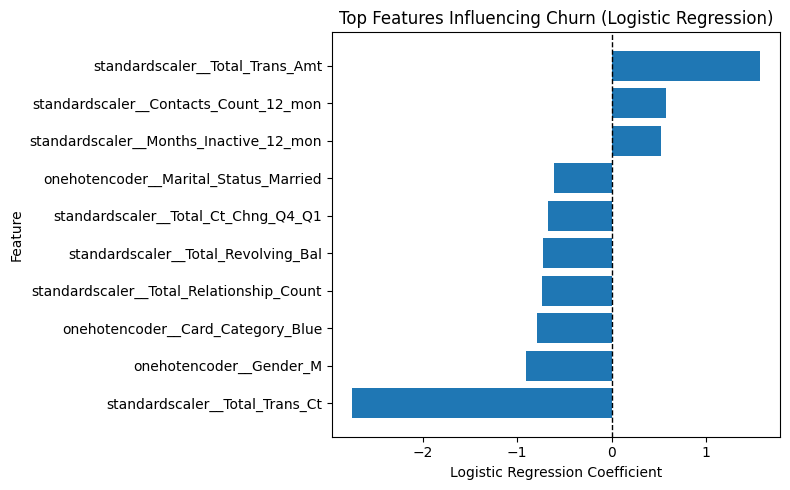

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt
# Select top 10 features by absolute coefficient
top_feats = (
    coef_df
    .sort_values("abs_coefficient", ascending=False)
    .head(10)
    .sort_values("coefficient")  # so bars are ordered nicely
)

plt.figure(figsize=(8, 5))
plt.barh(
    top_feats["feature"],
    top_feats["coefficient"]
)

plt.axvline(0, color="black", linestyle="--", linewidth=1)
plt.title("Top Features Influencing Churn (Logistic Regression)")
plt.xlabel("Logistic Regression Coefficient")
plt.ylabel("Feature")

plt.tight_layout()
plt.savefig("plots/coeff_importance.png", dpi=150, bbox_inches="tight")
plt.show()



In [79]:
df["Total_Trans_Ct"].corr(df["Total_Trans_Amt"])


np.float64(0.8071920346514347)

In [76]:
bin_df = pd.DataFrame({
    "Total_Trans_Amt": X_test["Total_Trans_Amt"],
    "churn": y_test
})

# Create deciles
bin_df["amt_decile"] = pd.qcut(
    bin_df["Total_Trans_Amt"],
    10,
    labels=False
) + 1


In [77]:
amt_churn = (
    bin_df
    .groupby("amt_decile")
    .agg(
        avg_amount=("Total_Trans_Amt", "mean"),
        churn_rate=("churn", "mean"),
        n=("churn", "size")
    )
    .reset_index()
)

amt_churn


,amt_decile,avg_amount,churn_rate,n
0,1,1265.822660,0.197044,203
1,2,1748.103448,0.211823,203
2,3,2253.747525,0.509901,202
3,4,2849.344828,0.325123,203
4,5,3673.079208,0.009901,202
5,6,4127.512315,0.000000,203
6,7,4432.737624,0.009901,202
7,8,4745.817734,0.039409,203
8,9,6370.608911,0.148515,202
9,10,13209.073892,0.152709,203


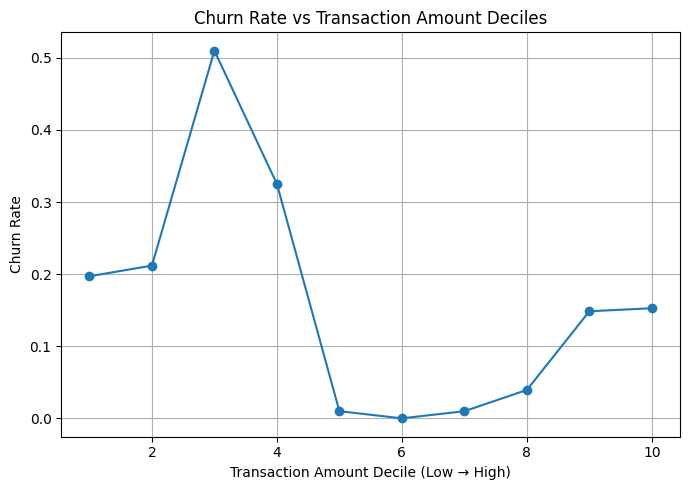

In [78]:
plt.figure(figsize=(7,5))
plt.plot(
    amt_churn["amt_decile"],
    amt_churn["churn_rate"],
    marker="o"
)
plt.xlabel("Transaction Amount Decile (Low → High)")
plt.ylabel("Churn Rate")
plt.title("Churn Rate vs Transaction Amount Deciles")
plt.grid(True)
plt.tight_layout()
plt.show()


Although the logistic regression coefficient for Total_Trans_Amt appears positive, decile-based analysis reveals a non-linear relationship between transaction amount and churn.

Customers in the lowest transaction amount deciles exhibit the highest churn rates, while mid-range spenders are the most stable. Churn increases slightly among the highest spenders but remains significantly lower than for low-activity customers.

This discrepancy arises because logistic regression coefficients represent conditional, linear effects after controlling for correlated variables (notably transaction count). Decile-level analysis provides a more intuitive, business-aligned interpretation.

The model relies primarily on behavioral transaction features, suggesting churn is driven more by engagement patterns than static demographics.

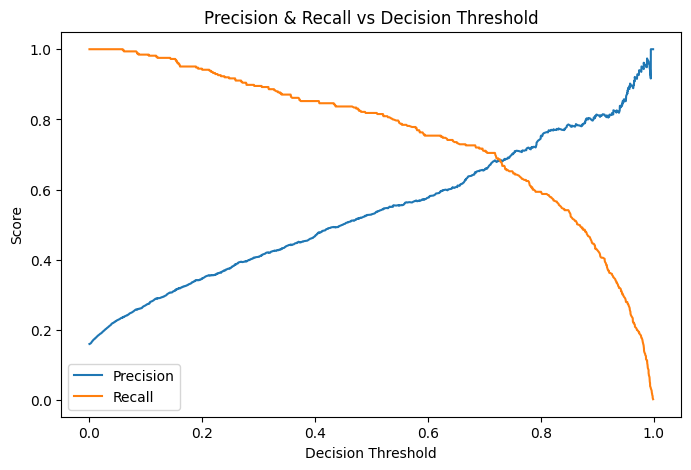

In [44]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test, y_prob)

plt.figure(figsize=(8,5))
plt.plot(thresholds, precisions[:-1], label="Precision")
plt.plot(thresholds, recalls[:-1], label="Recall")
plt.xlabel("Decision Threshold")
plt.ylabel("Score")
plt.title("Precision & Recall vs Decision Threshold")
plt.legend()
plt.show()


In [45]:
y_prob = best_model.predict_proba(X_test)[:, 1]
y_prob

array([0.00843734, 0.41780485, 0.41161762, ..., 0.98074163, 0.01827441,
       0.14682791], shape=(2026,))

In [46]:
from sklearn.metrics import classification_report, confusion_matrix

def evaluate_threshold(threshold):
    y_pred_thresh = (y_prob >= threshold).astype(int)
    print(f"\n=== Threshold = {threshold} ===")
    print(classification_report(y_test, y_pred_thresh, target_names=["Existing", "Attrited"]))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred_thresh))


In [47]:
for t in [0.4, 0.5, 0.7]:
    evaluate_threshold(t)



=== Threshold = 0.4 ===
              precision    recall  f1-score   support

    Existing       0.97      0.81      0.88      1701
    Attrited       0.47      0.85      0.60       325

    accuracy                           0.82      2026
   macro avg       0.72      0.83      0.74      2026
weighted avg       0.89      0.82      0.84      2026

Confusion Matrix:
[[1386  315]
 [  48  277]]

=== Threshold = 0.5 ===
              precision    recall  f1-score   support

    Existing       0.96      0.86      0.91      1701
    Attrited       0.53      0.82      0.64       325

    accuracy                           0.85      2026
   macro avg       0.75      0.84      0.78      2026
weighted avg       0.89      0.85      0.87      2026

Confusion Matrix:
[[1465  236]
 [  59  266]]

=== Threshold = 0.7 ===
              precision    recall  f1-score   support

    Existing       0.94      0.93      0.94      1701
    Attrited       0.66      0.71      0.68       325

    accuracy     

**Threshold Selection**
In customer churn prediction, missing a customer who is about to leave is usually more costly than mistakenly flagging a customer who will stay. Because of this, the model was designed to focus on identifying as many at-risk customers as possible.

A decision threshold of 0.4 was chosen because it allows the model to correctly identify about 85% of customers who eventually churn, while accepting a higher number of false alerts. These false alerts can be handled through low-cost actions such as targeted emails or promotional offers, whereas missed churners represent lost revenue.

In [48]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_vif = X_train[numeric_feats].copy()

In [49]:
X_vif_const = sm.add_constant(X_vif)

In [50]:
vif_df = pd.DataFrame({
    "feature": X_vif_const.columns,
    "VIF": [
        variance_inflation_factor(X_vif_const.values, i)
        for i in range(X_vif_const.shape[1])
    ]
})


/Users/fouzanhashmi/miniforge3/envs/churn-lab/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [51]:
vif_df = vif_df[vif_df["feature"] != "const"]
vif_df.sort_values("VIF", ascending=False)


,feature,VIF
7,Credit_Limit,inf
8,Total_Revolving_Bal,inf
9,Avg_Open_To_Buy,inf
11,Total_Trans_Amt,3.254141
12,Total_Trans_Ct,3.022113
14,Avg_Utilization_Ratio,2.913876
1,Customer_Age,2.673257
3,Months_on_book,2.654376
13,Total_Ct_Chng_Q4_Q1,1.209151
10,Total_Amt_Chng_Q4_Q1,1.192791


Variance Inflation Factor (VIF) analysis revealed perfect multicollinearity among Credit_Limit, Total_Revolving_Bal, and Avg_Open_To_Buy, which are linearly dependent by construction. To address this, only Avg_Utilization_Ratio was retained, while the redundant variables were excluded to ensure coefficient stability and interpretability.

In [52]:
import numpy as np
from scipy.stats import ks_2samp

proba_churn = y_prob[y_test == 1]
proba_non_churn = y_prob[y_test == 0]


In [53]:
ks_stat, p_value = ks_2samp(proba_churn, proba_non_churn)

print("KS Statistic:", ks_stat)
print("P-value:", p_value)


KS Statistic: 0.6854610410165966
P-value: 4.2100183229783147e-125


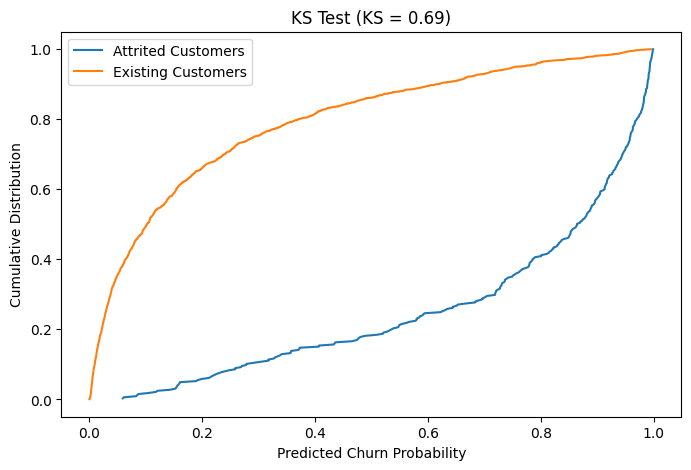

In [54]:
import matplotlib.pyplot as plt

# CDFs
x_churn = np.sort(proba_churn)
x_non_churn = np.sort(proba_non_churn)

cdf_churn = np.arange(1, len(x_churn)+1) / len(x_churn)
cdf_non_churn = np.arange(1, len(x_non_churn)+1) / len(x_non_churn)

plt.figure(figsize=(8,5))
plt.plot(x_churn, cdf_churn, label="Attrited Customers")
plt.plot(x_non_churn, cdf_non_churn, label="Existing Customers")

plt.xlabel("Predicted Churn Probability")
plt.ylabel("Cumulative Distribution")
plt.title(f"KS Test (KS = {ks_stat:.2f})")
plt.legend()
plt.show()


In [55]:
numeric_feats_updated = ["Customer_Age",
                 "Dependent_count",
                 "Months_on_book",
                 "Total_Relationship_Count",
                 "Months_Inactive_12_mon",
                 "Contacts_Count_12_mon",
                 "Total_Amt_Chng_Q4_Q1",
                 "Total_Trans_Amt",
                 "Total_Trans_Ct",
                 "Total_Ct_Chng_Q4_Q1",
                 "Avg_Utilization_Ratio"]


# Dropping Features
drop_feats_updated = ["CLIENTNUM",
              "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1",
              "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2",
              "Credit_Limit",
              "Total_Revolving_Bal",
              "Avg_Open_To_Buy"]







In [56]:
preprocessor_new = make_column_transformer(
    (StandardScaler(), numeric_feats_updated),
    (OneHotEncoder(handle_unknown="ignore"), categorical_feats),
    ("drop", drop_feats_updated)
)

lr_pipe_new = make_pipeline(
    preprocessor_new,
    LogisticRegression(
        max_iter=2000,
        C=10,
        class_weight="balanced",
        random_state=42
    )
)

lr_pipe_new.fit(X_train, y_train)


,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('columntransformer', ...), ('logisticregression', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('standardscaler', ...), ('onehotencoder', ...), ...]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If

In [57]:
y_pred_new = lr_pipe.predict(X_test)
y_prob_new = lr_pipe.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred_new))
print("ROC AUC:", roc_auc_score(y_test, y_prob_new))


              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1701
           1       0.77      0.54      0.63       325

    accuracy                           0.90      2026
   macro avg       0.84      0.75      0.79      2026
weighted avg       0.89      0.90      0.89      2026

ROC AUC: 0.9167204811649257


Using the default 0.5 threshold prioritizes precision over recall, resulting in fewer false churn alerts at the cost of missing some churners. Lowering the threshold increases recall when the business objective is early churn detection.

In [58]:
X_vif_new = df[numeric_feats_updated]
X_vif_new = sm.add_constant(X_vif_new)

vif_df_new = pd.DataFrame({
    "feature": X_vif_new.columns,
    "VIF": [variance_inflation_factor(X_vif_new.values, i)
            for i in range(X_vif_new.shape[1])]
})

vif_df_new = vif_df_new[vif_df_new["feature"] != "const"]
vif_df_new.sort_values("VIF", ascending=False)


,feature,VIF
8,Total_Trans_Amt,3.168871
9,Total_Trans_Ct,2.997467
1,Customer_Age,2.675201
3,Months_on_book,2.657580
10,Total_Ct_Chng_Q4_Q1,1.206871
7,Total_Amt_Chng_Q4_Q1,1.191539
4,Total_Relationship_Count,1.155199
6,Contacts_Count_12_mon,1.036756
11,Avg_Utilization_Ratio,1.032949
2,Dependent_count,1.024534


In [59]:
from sklearn.metrics import roc_auc_score

y_prob = lr_pipe_new.predict_proba(X_test)[:, 1]


In [60]:

proba_churn = y_prob[y_test == 1]
proba_non_churn = y_prob[y_test == 0]



In [61]:
from scipy.stats import ks_2samp

ks_stat, p_value = ks_2samp(proba_churn, proba_non_churn)

print(f"KS Statistic: {ks_stat:.3f}")
print(f"P-value: {p_value:.3e}")


KS Statistic: 0.659
P-value: 1.999e-114


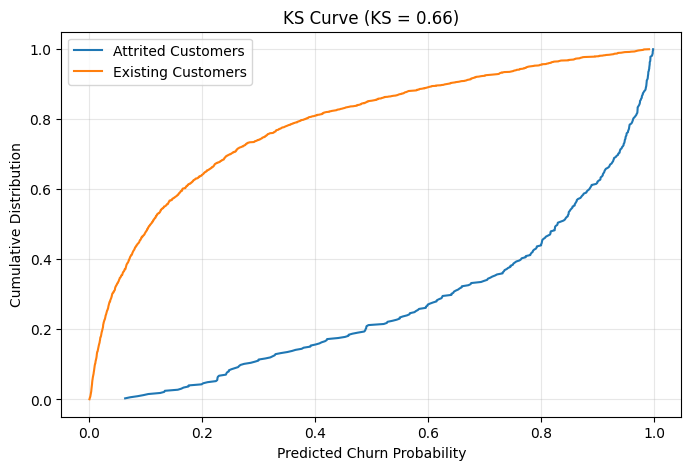

In [62]:
import matplotlib.pyplot as plt

# Sort probabilities
x_churn = np.sort(proba_churn)
x_non_churn = np.sort(proba_non_churn)

# Empirical CDFs
cdf_churn = np.arange(1, len(x_churn) + 1) / len(x_churn)
cdf_non_churn = np.arange(1, len(x_non_churn) + 1) / len(x_non_churn)

plt.figure(figsize=(8, 5))
plt.plot(x_churn, cdf_churn, label="Attrited Customers")
plt.plot(x_non_churn, cdf_non_churn, label="Existing Customers")

plt.xlabel("Predicted Churn Probability")
plt.ylabel("Cumulative Distribution")
plt.title(f"KS Curve (KS = {ks_stat:.2f})")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


In [63]:

# use your final pipeline (example)
final_model = lr_pipe_new  # or best_model, whichever you're using

train_score = final_model.predict_proba(X_train)[:, 1]
test_score  = final_model.predict_proba(X_test)[:, 1]


In [64]:
deciles_df = pd.DataFrame({
    "y_true": y_test.values,     # should be 0/1
    "score": test_score
})

# decile 10 = highest risk (top scores)
deciles_df["decile"] = pd.qcut(deciles_df["score"], 10, labels=False, duplicates="drop") + 1

decile_summary = (deciles_df.groupby("decile")["score"]
                  .agg(min_score="min", max_score="max", avg_score="mean", n="size")
                  .reset_index()
                  .sort_values("decile", ascending=False))

decile_summary


,decile,min_score,max_score,avg_score,n
9,10,0.850468,0.997851,0.938328,203
8,9,0.624357,0.848731,0.744424,202
7,8,0.388781,0.623426,0.504200,203
6,7,0.248974,0.388441,0.312965,202
5,6,0.160434,0.247786,0.203349,203
4,5,0.098646,0.159887,0.125557,202
3,4,0.058663,0.098525,0.076818,203
2,3,0.028897,0.058584,0.041714,202
1,2,0.012637,0.028742,0.020321,203
0,1,0.000291,0.012593,0.006362,203


In [65]:
scored_test = X_test.copy()
scored_test["y_true"] = y_test.values
scored_test["score"] = test_score
scored_test.head()


,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2,y_true,score
2919,767114958,65,M,0,Uneducated,Single,Less than $40K,Blue,56,4,...,1153.0,1.035,3250,70,0.591,0.643,0.000100,0.99990,0,0.011071
9301,708123033,41,F,3,Graduate,Single,Less than $40K,Silver,30,2,...,11463.0,0.908,14511,105,0.721,0.000,0.000031,0.99997,0,0.253760
2936,715424283,31,F,0,College,Married,Less than $40K,Blue,21,5,...,1677.0,1.369,3059,50,0.613,0.000,0.000095,0.99991,0,0.402845
8134,717865008,51,F,1,Unknown,Married,$40K - $60K,Blue,36,2,...,970.3,0.747,4425,81,1.077,0.325,0.000034,0.99997,0,0.004676
5902,710188308,51,F,3,Graduate,Single,Less than $40K,Blue,41,6,...,371.0,0.767,4927,73,0.738,0.756,0.000199,0.99980,0,0.030790


In [66]:
def psi(expected, actual, buckets=10, eps=1e-6):
    """
    expected: train scores
    actual: test scores
    buckets: number of bins (deciles usually)
    """
    expected = pd.Series(expected).astype(float)
    actual = pd.Series(actual).astype(float)

    # bins from expected only
    _, bin_edges = pd.qcut(expected, q=buckets, retbins=True, duplicates="drop")
    # ensure edges cover all test values
    bin_edges[0] = -np.inf
    bin_edges[-1] = np.inf

    exp_bins = pd.cut(expected, bins=bin_edges)
    act_bins = pd.cut(actual, bins=bin_edges)

    exp_pct = exp_bins.value_counts(normalize=True).sort_index()
    act_pct = act_bins.value_counts(normalize=True).sort_index()

    # align indexes (prevents "different length" problems)
    psi_df = pd.DataFrame({"expected_pct": exp_pct, "actual_pct": act_pct}).fillna(0)

    # add eps to avoid log(0)
    e = np.clip(psi_df["expected_pct"].values, eps, None)
    a = np.clip(psi_df["actual_pct"].values, eps, None)

    psi_df["psi_bin"] = (a - e) * np.log(a / e)
    psi_value = psi_df["psi_bin"].sum()

    return psi_value, psi_df.reset_index(names="bin")

psi_value, psi_table = psi(train_score, test_score, buckets=10)
psi_value, psi_table.sort_values("psi_bin", ascending=False).head(10)


(np.float64(0.013887355218526767),
                 bin  expected_pct  actual_pct   psi_bin
 5    (0.157, 0.268]      0.099988    0.125864  0.005955
 9      (0.889, inf]      0.099988    0.080454  0.004246
 0     (-inf, 0.011]      0.100111    0.089339  0.001226
 4   (0.0906, 0.157]      0.099988    0.111056  0.001162
 2  (0.0272, 0.0515]      0.099988    0.090326  0.000982
 6    (0.268, 0.445]      0.099988    0.103653  0.000132
 7    (0.445, 0.676]      0.099988    0.097236  0.000077
 1   (0.011, 0.0272]      0.099988    0.102172  0.000047
 8    (0.676, 0.889]      0.099988    0.098223  0.000031
 3  (0.0515, 0.0906]      0.099988    0.101678  0.000028)

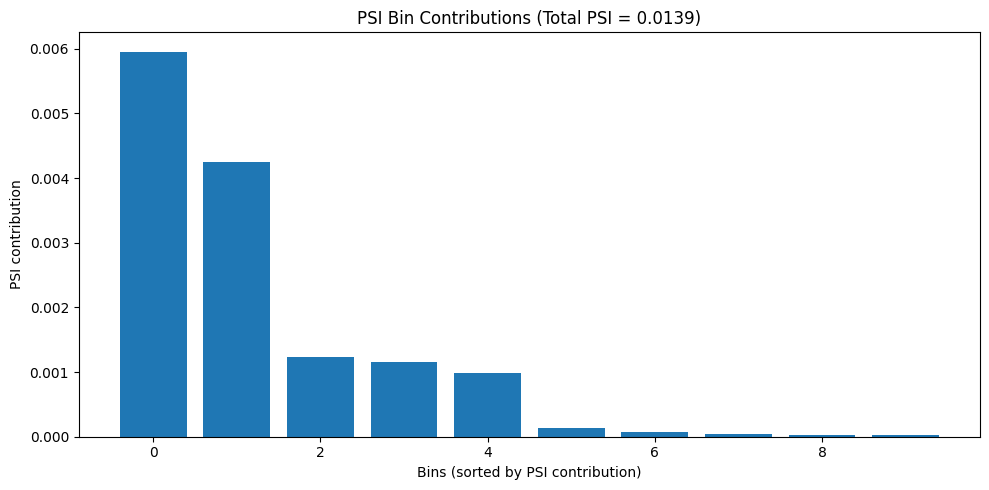

In [67]:
psi_plot = psi_table.sort_values("psi_bin", ascending=False)

plt.figure(figsize=(10, 5))
plt.bar(range(len(psi_plot)), psi_plot["psi_bin"])
plt.title(f"PSI Bin Contributions (Total PSI = {psi_value:.4f})")
plt.xlabel("Bins (sorted by PSI contribution)")
plt.ylabel("PSI contribution")
plt.tight_layout()
plt.show()


In [68]:
lift_df = pd.DataFrame({"y": y_test.values, "score": test_score}).copy()

# Sort highest churn probability first
lift_df = lift_df.sort_values("score", ascending=False).reset_index(drop=True)

# Decile 1 = highest risk
lift_df["decile"] = pd.qcut(lift_df.index, q=10, labels=False) + 1

decile_lift = lift_df.groupby("decile").agg(
    n=("y", "size"),
    churners=("y", "sum"),
    avg_score=("score", "mean")
).reset_index().sort_values("decile")   # 1 -> 10

decile_lift["churn_rate"] = decile_lift["churners"] / decile_lift["n"]
decile_lift["cum_churners"] = decile_lift["churners"].cumsum()
decile_lift["cum_population"] = decile_lift["n"].cumsum()
decile_lift["cum_capture_rate"] = decile_lift["cum_churners"] / decile_lift["churners"].sum()
decile_lift["cum_population_rate"] = decile_lift["cum_population"] / decile_lift["n"].sum()


decile_lift


,decile,n,churners,avg_score,churn_rate,cum_churners,cum_population,cum_capture_rate,cum_population_rate
0,1,203,151,0.938328,0.743842,151,203,0.464615,0.100197
1,2,203,81,0.743828,0.399015,232,406,0.713846,0.200395
2,3,202,45,0.503610,0.222772,277,608,0.852308,0.300099
3,4,203,21,0.312644,0.103448,298,811,0.916923,0.400296
4,5,202,18,0.203129,0.089109,316,1013,0.972308,0.500000
5,6,203,5,0.125423,0.024631,321,1216,0.987692,0.600197
6,7,202,4,0.076711,0.019802,325,1418,1.000000,0.699901
7,8,203,0,0.041650,0.000000,325,1621,1.000000,0.800099
8,9,202,0,0.020279,0.000000,325,1823,1.000000,0.899803
9,10,203,0,0.006362,0.000000,325,2026,1.000000,1.000000


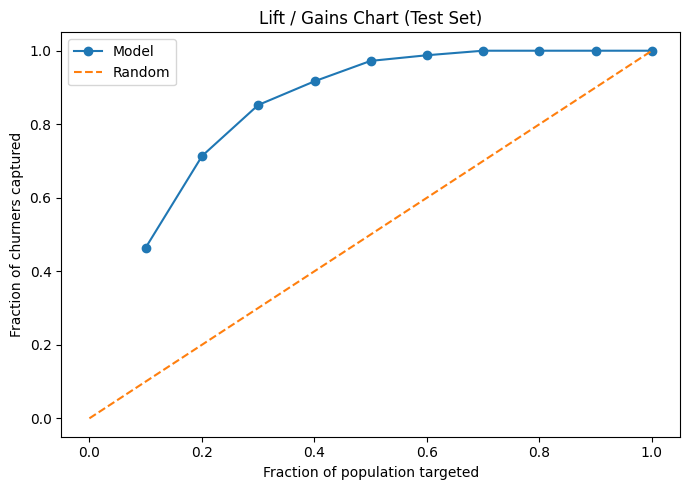

In [69]:
plt.figure(figsize=(7, 5))
plt.plot(decile_lift["cum_population_rate"], decile_lift["cum_capture_rate"], marker="o", label="Model")
plt.plot([0, 1], [0, 1], linestyle="--", label="Random")
plt.title("Lift / Gains Chart (Test Set)")
plt.xlabel("Fraction of population targeted")
plt.ylabel("Fraction of churners captured")
plt.legend()
plt.tight_layout()
# plt.savefig("plots/lift_chart.png", bbox_inches="tight", dpi=150)
plt.show()

In [70]:
decile_lift[["decile", "avg_score", "churn_rate"]]


,decile,avg_score,churn_rate
0,1,0.938328,0.743842
1,2,0.743828,0.399015
2,3,0.503610,0.222772
3,4,0.312644,0.103448
4,5,0.203129,0.089109
5,6,0.125423,0.024631
6,7,0.076711,0.019802
7,8,0.041650,0.000000
8,9,0.020279,0.000000
9,10,0.006362,0.000000


In [71]:
def gains_table(y_true, y_score, n_bins=10):
    df = pd.DataFrame({"y": y_true, "score": y_score})
    df = df.sort_values("score", ascending=False)

    df["decile"] = pd.qcut(df["score"], n_bins, labels=False, duplicates="drop")

    gains = df.groupby("decile").agg(
        churners=("y", "sum"),
        total=("y", "size")
    ).sort_index(ascending=False)

    gains["cum_churners"] = gains["churners"].cumsum()
    gains["cum_population"] = gains["total"].cumsum()

    gains["cum_capture_rate"] = gains["cum_churners"] / gains["churners"].sum()
    gains["cum_population_rate"] = gains["cum_population"] / gains["total"].sum()

    # force (0,0)
    gains = pd.concat([
        pd.DataFrame({"cum_population_rate":[0], "cum_capture_rate":[0]}),
        gains[["cum_population_rate", "cum_capture_rate"]]
    ])

    return gains


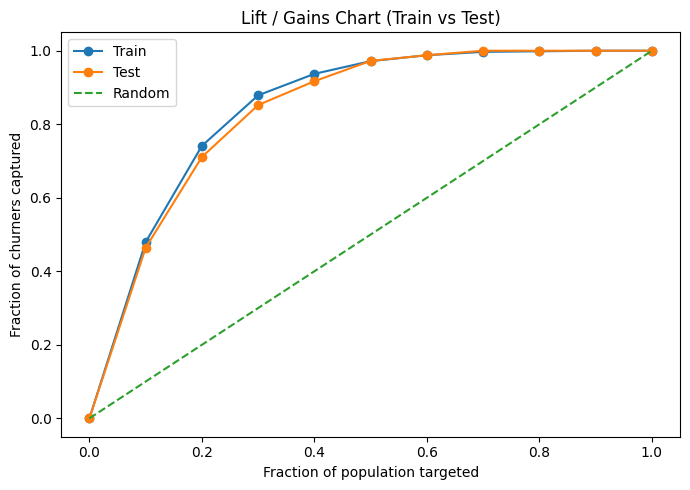

In [72]:
train_gains = gains_table(y_train, train_score)
test_gains  = gains_table(y_test, test_score)

plt.figure(figsize=(7,5))
plt.plot(train_gains["cum_population_rate"], train_gains["cum_capture_rate"],
         marker="o", label="Train")
plt.plot(test_gains["cum_population_rate"], test_gains["cum_capture_rate"],
         marker="o", label="Test")
plt.plot([0,1],[0,1], "--", label="Random")

plt.xlabel("Fraction of population targeted")
plt.ylabel("Fraction of churners captured")
plt.title("Lift / Gains Chart (Train vs Test)")
plt.legend()
plt.tight_layout()
plt.savefig("plots/lift_chart.png", dpi=150)
plt.show()


In [73]:
decile_lift[["decile", "avg_score", "churn_rate"]]

,decile,avg_score,churn_rate
0,1,0.938328,0.743842
1,2,0.743828,0.399015
2,3,0.503610,0.222772
3,4,0.312644,0.103448
4,5,0.203129,0.089109
5,6,0.125423,0.024631
6,7,0.076711,0.019802
7,8,0.041650,0.000000
8,9,0.020279,0.000000
9,10,0.006362,0.000000


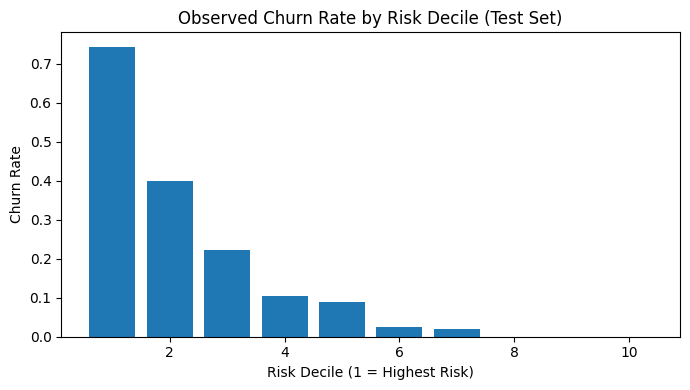

In [74]:
plt.figure(figsize=(7,4))
plt.bar(decile_lift["decile"], decile_lift["churn_rate"])
plt.xlabel("Risk Decile (1 = Highest Risk)")
plt.ylabel("Churn Rate")
plt.title("Observed Churn Rate by Risk Decile (Test Set)")
plt.tight_layout()
plt.savefig("plots/decile_churn_rate.png", dpi=150)
plt.show()
